<code>Task 2: Линейная диаграмма со стилями
    1.Анализируйте только пользователей, а не администраторов.
    2.Используйте фильтр status = 'ready' для коммитов.
    3.Анализируйте только те даты, когда были зафиксированы и просмотры, и коммиты.
    4.Размер шрифта — 8.
    5.figsize — 15,8.
    6.В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос: «Сколько раз количество просмотров превышало 150?». В ячейке ниже добавьте: «Ответ:___». Поместите в текст конкретное число вместо подчеркивания
</code>

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Коннект
con = sqlite3.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [4]:
#Выборка данных из таблицы pageviews
sql = '''
      SELECT datetime FROM pageviews 
      WHERE uid like "user_%" 
      '''


In [5]:

pageviews = pd.read_sql(sql, con, parse_dates = ['datetime'])
pageviews

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [6]:
#Выборка данных из таблицы checker
sql = '''
      SELECT timestamp
      FROM checker 
      WHERE uid like "user_%"
      AND status = "ready" 
      '''


In [7]:
commit = pd.read_sql(sql, con, parse_dates = ['timestamp'])
commit

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104
...,...
1681,2020-05-21 20:01:48.959966
1682,2020-05-21 20:18:54.487900
1683,2020-05-21 20:19:06.872761
1684,2020-05-21 20:22:41.877806


In [8]:
#Группировка колличества посещений по дате
date = pageviews 
date['date'] = date.datetime.dt.date
date = date.groupby('date', as_index=False)\
    .agg({'datetime': 'count'})\
    .rename(columns={'datetime': 'views'})
date.head()

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


In [9]:
#Группировка колличества посещений по дате
commits = commit
commits['commit'] = commits.timestamp.dt.date
commits = commits.groupby('commit', as_index=False)\
    .agg({'timestamp': 'count'})\
    .rename(columns={'timestamp': 'commits'})
commits.head()

,commit,commits
0,2020-04-17,13
1,2020-04-18,39
2,2020-04-19,18
3,2020-04-20,16
4,2020-04-21,13


In [10]:
#Объеденение датафреймов
df = pd.merge(date, commits, how='inner', left_on='date', right_on='commit').drop(columns='commit')
df.head()

,date,views,commits
0,2020-04-17,1,13
1,2020-04-18,23,39
2,2020-04-19,15,18
3,2020-04-21,3,13
4,2020-04-22,1,16


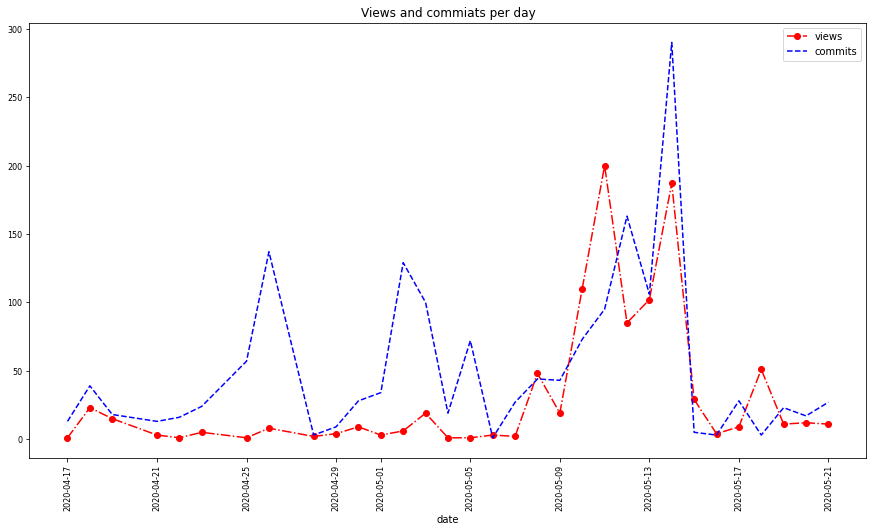

In [11]:
#График
df.plot(x = 'date', 
           y = ['views', 'commits'], 
           kind = 'line',
           title = 'Views and commiats per day',
           xlabel = 'date',
           fontsize = 8,
           figsize = (15,8),
           rot = 90,
           style = ['o-.','--'],
           color = ['red', 'blue'])
plt.show()

<code>__«Сколько раз количество просмотров превышало 150?».__
    __«Ответ: 2»__
    
</code>

In [12]:
#Закроем соеденение
con.close()